In [4]:
from PIL import Image

from keras.layers import Input, Dense, Layer
from keras.models import Model
from keras.constraints import Constraint
from keras.regularizers import Regularizer

from keras import backend as K
from keras import regularizers

import tensorflow as tf
from tensorflow import keras
from tensorflow import set_random_seed

import numpy as np
from numpy.random import seed
import os
import sys

import matplotlib.pyplot as plt
from matplotlib.cm import *
from matplotlib.pyplot import imshow

import seaborn as sns

import sklearn as sk
from sklearn import feature_extraction
import networkx as nx

seed(1)
set_random_seed(1)
print(keras.__version__)

2.2.4-tf


In [5]:
SYS_PATH_ADD_DIR = "/home/dhw3172/projects/water"
sys.path.append( os.path.join(SYS_PATH_ADD_DIR, "Python") )

In [6]:
from GenlassoAutoencoder import *
print(ROOT_DIR)

/home/dhw3172/projects/water


# Data input

In [7]:
rast=readImage()
arr= readNpArray()
tens=readTensor()

There are 1296 pixels - dim - (48, 27) in the image /home/dhw3172/projects/water/Data/GeoData/Raster/DEM/MtlPoin_Sain_VillElev.tif
There are 1296 pixels - dim - (48, 27) in the image /home/dhw3172/projects/water/Data/GeoData/Raster/DEM/MtlPoin_Sain_VillElev.tif
There are 1296 pixels - dim - (48, 27) in the image /home/dhw3172/projects/water/Data/GeoData/Raster/DEM/MtlPoin_Sain_VillElev.tif


In [8]:
rastSizeTransposed=arr.shape

In [24]:

"""
## Tests with incidence matrix


#incMat=getIncidenceMatrix(rast)
#incMat


"""

"""
tupleEdgeIdx=np.where(incMat2.todense() != 0)
reg=0.
for k in range(len(tupleEdgeIdx[0])): #for each edge
    reg+=(incMat2[tupleEdgeIdx[0][k], tupleEdgeIdx[1][k] ]  )
    #print(incMat2[tupleEdgeIdx[0][k], tupleEdgeIdx[1][k] ], "--", tupleEdgeIdx[0][k], tupleEdgeIdx[1][k])
print(reg)  #sum over the edges cancels out
"""
 

"""
adjMatNoDiag=adjMat-np.diag( np.diagonal(adjMat) )
endPoints=np.where( adjMatNoDiag[0, ] != 0)[1]
adjMatNoDiag[ 0, endPoints]
endPoints

"""

'\nadjMatNoDiag=adjMat-np.diag( np.diagonal(adjMat) )\nendPoints=np.where( adjMatNoDiag[0, ] != 0)[1]\nadjMatNoDiag[ 0, endPoints]\nendPoints\n\n'

# Basic unregularized model 

In [7]:
#Build the model

model = tf.keras.Sequential([
    ElementWiseMult(input_shape=rastSizeTransposed)
])

W0924 14:49:21.381275 139910139299648 deprecation.py:506] From /home/dhw3172/anaconda3/envs/pyAudio37/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


None
Here is the dim(?, 27, 48)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
element_wise_mult (ElementWi (None, 27, 48)            1296      
Total params: 1,296
Trainable params: 1,296
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Compile and fit the model
model.compile(optimizer='adam',
             loss='mean_squared_error')

In [10]:
modelFit=model.fit(x=tens, y=tens, epochs=200, verbose=0)
predImg=model.predict(tens)
print("Finished calibrating model")

Finished calibrating model


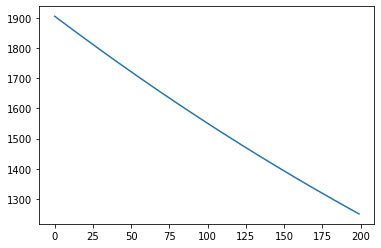

In [11]:
plt.plot(modelFit.epoch, modelFit.history['loss']) 

## Plot the original and predicted image

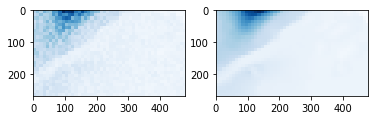

In [12]:

plt.subplot(1,2,1)
imgPred1=normalizePlotImg(predImg,fact=10)
plt.imshow(imgPred1)
    
plt.subplot(1,2,2)
imgOrig=normalizePlotImg(arr,fact=10)
plt.imshow(imgOrig)

# L1

## Basic implementation

In [13]:
modelL1 = tf.keras.Sequential([
    ElementWiseMult(input_shape=rastSizeTransposed,
                    kernel_regularizer = keras.regularizers.l1(l=1000))
])

Here is the dim(?, 27, 48)


In [14]:
modelL1.compile(optimizer="adam",loss="mean_squared_error")

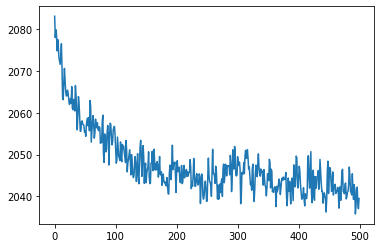

In [53]:
modelFitL1=modelL1.fit(tens,tens,epochs=500,verbose=0)
plt.plot(modelFitL1.epoch ,modelFitL1.history["loss"])

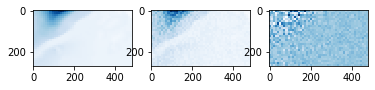

In [54]:
resizeFact=10
listPlots=[None] * 3

plt.subplot(1,3,1)
listPlots[0]=normalizePlotImg(arr, fact=resizeFact)
plt.imshow(listPlots[0])
#listPlots[0].show()


plt.subplot(1,3,2)
listPlots[1]=normalizePlotImg(model.predict(tens), fact=resizeFact)
plt.imshow(listPlots[1])

plt.subplot(1,3,3)
listPlots[2]=normalizePlotImg(modelL1.predict(tens), fact=resizeFact)
plt.imshow(listPlots[2])

## Manual implementation of std lasso (L1)

In [55]:
modelL1Man = tf.keras.Sequential([
    ElementWiseMult(input_shape=rastSizeTransposed,
                    kernel_regularizer = fused_l1_with_reg_lasso_cls( rast, penWeightLassoStd=1000, penWeightLassoFused=0)  )
])

There are 2517 edges in the lattice graph
Here is the dim(?, 27, 48)


In [56]:
modelL1Man.compile(optimizer="adam",loss="mean_squared_error")
modelL1Man.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
element_wise_mult_7 (Element (None, 27, 48)            1296      
Total params: 1,296
Trainable params: 1,296
Non-trainable params: 0
_________________________________________________________________


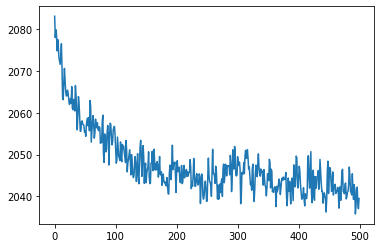

In [57]:
modelFitL1Man=modelL1Man.fit(tens,tens,epochs=500,verbose=0)
plt.plot(modelFitL1.epoch ,modelFitL1.history["loss"])

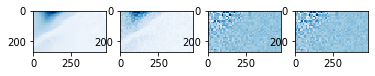

In [58]:
listPlots=[None] * 4

plt.subplot(1,4,1)
listPlots[0]=normalizePlotImg(arr, fact=resizeFact)
plt.imshow(listPlots[0])
#listPlots[0].show()


plt.subplot(1,4,2)
listPlots[1]=normalizePlotImg(model.predict(tens), fact=resizeFact)
plt.imshow(listPlots[1])

plt.subplot(1,4,3)
listPlots[2]=normalizePlotImg(modelL1.predict(tens), fact=resizeFact)
plt.imshow(listPlots[2])


plt.subplot(1,4,4)
listPlots[3]=normalizePlotImg(modelL1Man.predict(tens), fact=resizeFact)
plt.imshow(listPlots[2])

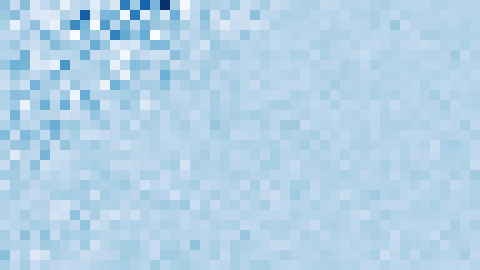

In [35]:
normalizePlotImg(modelL1Man.predict(tens), fact=resizeFact)

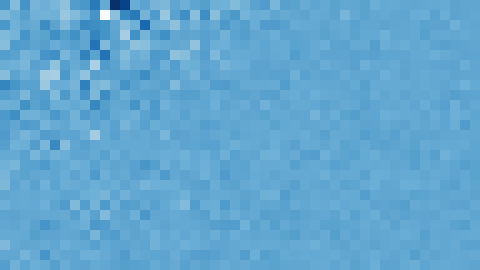

In [36]:
normalizePlotImg(modelL1.predict(tens), fact=resizeFact)

# With Fused lasso component

## Manual implementation of std lasso (L1) + fused lasso component

In [47]:
modelL1Fused = tf.keras.Sequential([
    ElementWiseMult(input_shape=rastSizeTransposed,
                    kernel_regularizer = fused_l1_with_reg_lasso_cls( rast, penWeightLassoStd=0, penWeightLassoFused=1000)  )
])

There are 2517 edges in the lattice graph
Here is the dim(?, 27, 48)


In [48]:
modelL1Fused.compile(optimizer="adam",loss="mean_squared_error")
modelL1Fused.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
element_wise_mult_6 (Element (None, 27, 48)            1296      
Total params: 1,296
Trainable params: 1,296
Non-trainable params: 0
_________________________________________________________________


[2213.937255859375, 2212.16064453125, 2218.351806640625, 2218.235107421875, 2218.144775390625, 2224.388427734375, 2219.650146484375, 2215.445556640625, 2221.7158203125, 2218.79931640625]


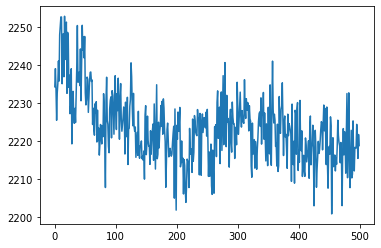

In [93]:
modelFitL1Fused=modelL1Fused.fit(tens,tens,epochs=500,verbose=0,use_multiprocessing=True)
plt.plot(modelFitL1Fused.epoch ,modelFitL1Fused.history["loss"])
hist=modelFitL1Fused.history["loss"]
print(hist[len(hist)-10:len(hist)])

# Inspect layers

In [159]:
listWeights=[l.get_weights() for l in modelL1Man.layers]
weightMat = listWeights[0][0]

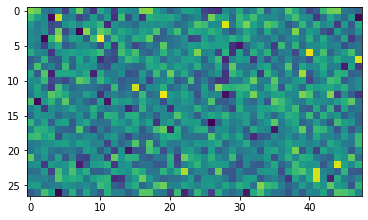

In [160]:
plt.imshow(weightMat)

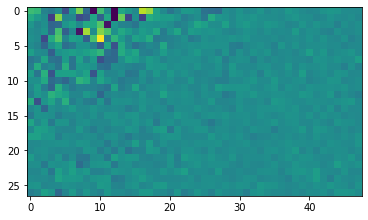

In [161]:
plt.imshow(modelL1Man.predict(tens)[0]) 

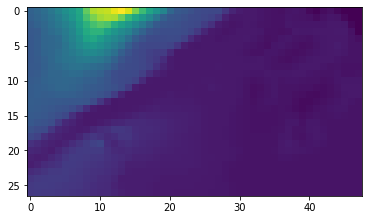

In [162]:
plt.imshow( tens[0])

In [164]:
np.min(weightMat)

-0.0004210869

In [165]:
edgeList=getEdgeList(rast)

There are 2517 edges in the lattice graph


In [166]:
edgeList["diffBeta"] = [weightMat[ row["start"][0], row["start"][1] ] - weightMat[ row["end"][0], row["end"][1] ] for k, row in edgeList.iterrows() ] 

In [167]:
edgeList.head()

start     end  diffBeta
0  (0, 0)  (1, 0)  0.000111
1  (0, 0)  (0, 1)  0.000053
2  (0, 1)  (1, 1)  0.000174
3  (0, 1)  (0, 2)  0.000311
4  (0, 2)  (1, 2) -0.000055

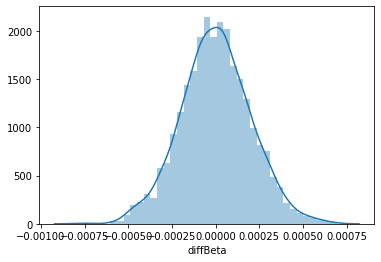

In [168]:
sns.distplot( edgeList["diffBeta"])

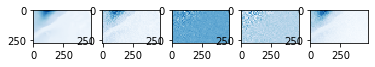

In [50]:
listPlots=[None] * 5

plt.subplot(1,5,1)
listPlots[0]=normalizePlotImg(arr, fact=resizeFact)
plt.imshow(listPlots[0])
#listPlots[0].show()


plt.subplot(1,5,2)
listPlots[1]=normalizePlotImg(model.predict(tens), fact=resizeFact)
plt.imshow(listPlots[1])

plt.subplot(1,5,3)
listPlots[2]=normalizePlotImg(modelL1.predict(tens), fact=resizeFact)
plt.imshow(listPlots[2])


plt.subplot(1,5,4)
listPlots[3]=normalizePlotImg(modelL1Man.predict(tens), fact=resizeFact)
plt.imshow(listPlots[3])

plt.subplot(1,5,5)
listPlots[4]=normalizePlotImg(modelL1Fused.predict(tens), fact=resizeFact)
plt.imshow(listPlots[4])

2200.882080078125


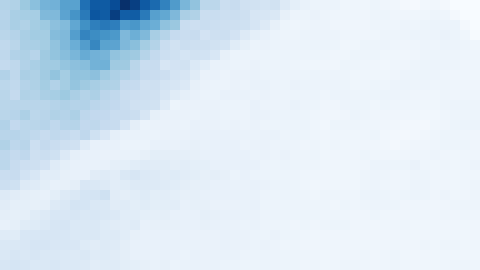

In [94]:
print(min(modelFitL1Fused.history["loss"]))
normalizePlotImg(modelL1Fused.predict(tens), fact=resizeFact)

2033.393310546875


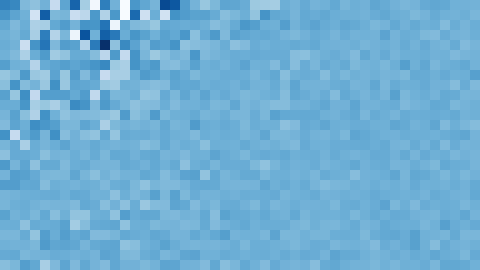

In [95]:
print(min(modelFitL1Man.history["loss"]))
normalizePlotImg(modelL1Man.predict(tens), fact=resizeFact)

2035.827880859375


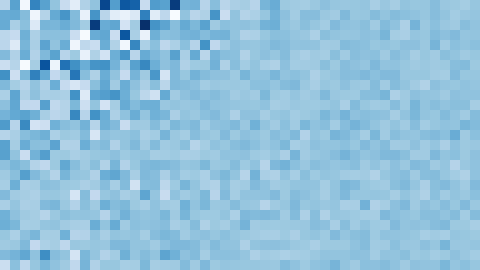

In [96]:
print(min(modelFitL1.history["loss"]))
normalizePlotImg(modelL1.predict(tens), fact=resizeFact)

# Fused lasso path for different weight penalties

There are 2517 edges in the lattice graph
Here is the dim(?, 27, 48)
There are 2517 edges in the lattice graph
Here is the dim(?, 27, 48)
There are 2517 edges in the lattice graph
Here is the dim(?, 27, 48)
There are 2517 edges in the lattice graph
Here is the dim(?, 27, 48)
There are 2517 edges in the lattice graph
Here is the dim(?, 27, 48)


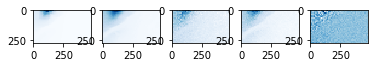

In [85]:
numMods=5
listPlots=[None] * numMods
listMods=[None] * numMods
numEpochs=200

for k in range(numMods):

    #Define the model with penalty
    listMods[k] = tf.keras.Sequential([
        ElementWiseMult(input_shape=rastSizeTransposed,
                        kernel_regularizer = fused_l1_with_reg_lasso_cls( rast, penWeightLassoStd=0, penWeightLassoFused=10**(k+1))  )
    ])
    
    #Compile
    listMods[k].compile(optimizer="adam",loss="mean_squared_error")
    
    #Optimize
    listMods[k].fit(tens,tens,epochs=numEpochs,verbose=0)
    
    #Plot
    plt.subplot(1,5,k+1)
    listPlots[k]=normalizePlotImg(listMods[k].predict(tens), fact=resizeFact)
    plt.imshow(listPlots[k])

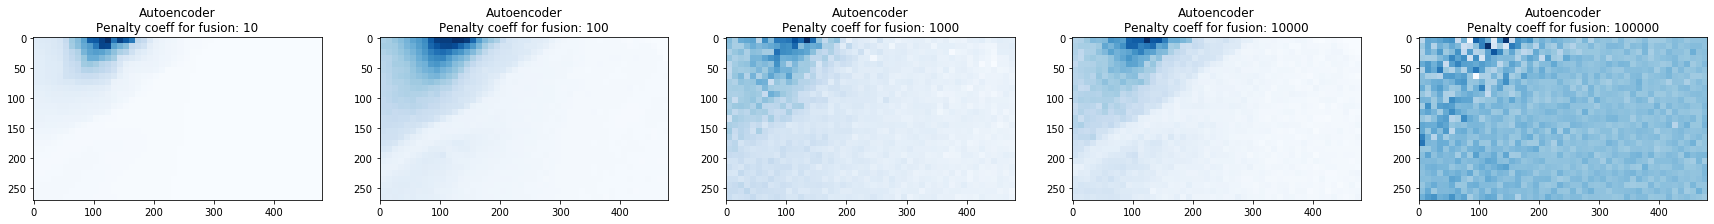

In [157]:
for k in range(numMods):
    plt.subplot(1,5,k+1)
    listPlots[k]=normalizePlotImg(listMods[k].predict(tens), fact=resizeFact)
    plt.imshow(listPlots[k])
    ax = plt.gca()
    ax.set_title(f"Autoencoder\nPenalty coeff for fusion: {10**(k+1)}")
    
fig = plt.gcf()
fig.set_size_inches(30,25)

plt.savefig(os.path.join(ROOT_DIR, "Figures", "clustVsGenlasso", "autoencoderFusedLasso.png"))

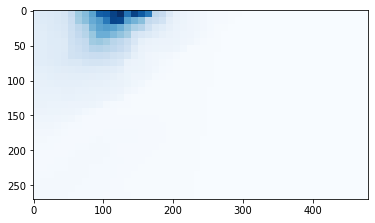

In [86]:
plt.imshow(listPlots[0])

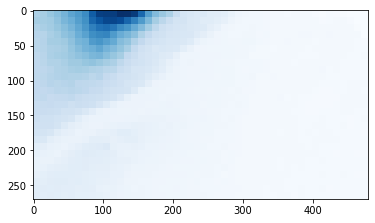

In [87]:
plt.imshow(listPlots[1])

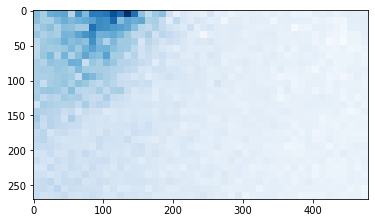

In [88]:
plt.imshow(listPlots[2])

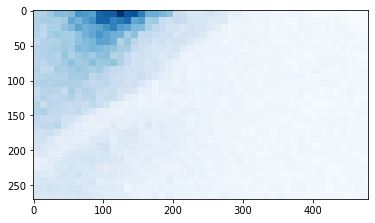

In [89]:
plt.imshow(listPlots[3])

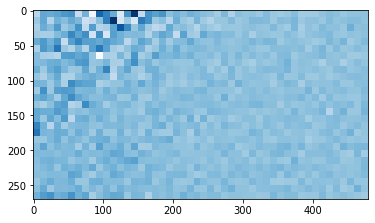

In [91]:
plt.imshow(listPlots[4])

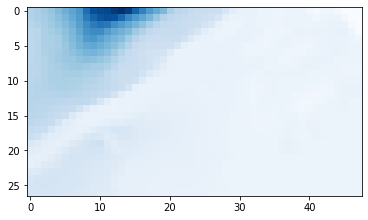

In [90]:
plt.imshow(arr,get_cmap("Blues"))